# AUGMENTED INTELLIGENCE:
# A Human-Machine Marriage on our Way to Complete Intelligent Automation


The examples are largely based on the examples presented in the GitHub repositoryof SHAP:
 - SHAP: https://github.com/slundberg/shap

## SHAP on Tabular Data - Boston Housing Dataset

The data for this practical part comes from the UCI Machine Learning Repository:
https://archive.ics.uci.edu/ml/index.php

It represents a collection of <b>properties of houses in Boston</b> (Massachusetts) and the corresponding <b>monetary value of the house</b>. We use this dataset as a showcase for SHAP on tabular data.

<b>1) Package Imports</b>

In [1]:
import numpy as np
import pandas as pd
import shap
from random import seed
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

<b>2) Setting some paths and constants.</b>

In [2]:
seed(0)
shap.initjs()
DATA_PATH = '../wad-ai-congress-2018/data/train.csv'

<b>3) Loading Data, Dropping & Renaming some Variables for Cleaner Visualization</b>

In [3]:
KEEP_COLS = ['crim', 'rm', 'age', 'ptratio', 'lstat', 'medv', 'nox']
df = pd.read_csv(DATA_PATH).drop('ID', axis=1)

In [4]:
FROM_TO = {
    'crim': 'CrimeRate',
    'rm': 'Rooms',
    'age': 'Age',
    'ptratio': 'PupilTeacherRatio',
    'lstat': 'LowSocialClass',
    'medv': 'Value',
    'nox': 'NOX'
}
TARGET = 'Value'

df = df[KEEP_COLS]
df.rename(columns=FROM_TO, inplace=True)

<b>4) Having a look at the data.</b>

In [5]:
df.head()

,CrimeRate,Rooms,Age,PupilTeacherRatio,LowSocialClass,Value,NOX
0,0.00632,6.575,65.2,15.3,4.98,24.0,0.538
1,0.02731,6.421,78.9,17.8,9.14,21.6,0.469
2,0.03237,6.998,45.8,18.7,2.94,33.4,0.458
3,0.06905,7.147,54.2,18.7,5.33,36.2,0.458
4,0.08829,6.012,66.6,15.2,12.43,22.9,0.524


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 7 columns):
CrimeRate            333 non-null float64
Rooms                333 non-null float64
Age                  333 non-null float64
PupilTeacherRatio    333 non-null float64
LowSocialClass       333 non-null float64
Value                333 non-null float64
NOX                  333 non-null float64
dtypes: float64(7)
memory usage: 18.3 KB


<b>5) Variable Descriptions</b>
 - <b>CrimeRate</b>: per capita crime rate by town.
 - <b>NOX</b>: nitrogen oxides concentration (parts per 10 million).
 - <b>Rooms</b>: average number of rooms per dwelling.
 - <b>Age</b>: proportion of owner-occupied units built prior to 1940.
 - <b>PupilTeacherRatio</b>: pupil-teacher ratio by town.
 - <b>LowSocialClass</b>: lower status of the population (percent).
 - <b>Value</b>: median value of owner-occupied homes in \$1000s.

<b>6) Splitting the Data</b>

In [7]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(TARGET, axis=1), df[TARGET],
                                                    test_size=0.2, shuffle=True)
x_test = x_test.reset_index(drop=True)

<b>7) Fitting XGBoost Model</b>

In [8]:
xgbreg = XGBRegressor(random_state=0)
xgbreg.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

<b>8) Making Predictions on Test Set</b>

In [9]:
preds = xgbreg.predict(x_test)

<b>9) Getting SHAP values for our Model and Test Set</b>

In [10]:
explainer = shap.TreeExplainer(xgbreg)
shap_values = explainer.shap_values(x_test)

<b>10) Explaining a Single Prediction</b>

In [11]:
SAMPLE_IX = 4

In [12]:
x_test.iloc[SAMPLE_IX] # feature values of that sample

CrimeRate             15.1772
Rooms                  6.1520
Age                  100.0000
PupilTeacherRatio     20.2000
LowSocialClass        26.4500
NOX                    0.7400
Name: 4, dtype: float64

In [13]:
preds[SAMPLE_IX] # prediction on that sample

10.110206

In [14]:
x_test.describe().transpose() # compare to distributions of feature values

,count,mean,std,min,25%,50%,75%,max
CrimeRate,67.0,3.482065,6.356477,0.01096,0.088875,0.33045,4.4821,25.0461
Rooms,67.0,6.246179,0.682722,3.86300,5.925000,6.16700,6.5970,7.9290
Age,67.0,68.107463,28.638654,6.00000,45.800000,79.20000,93.0000,100.0000
PupilTeacherRatio,67.0,18.591045,2.052621,13.00000,17.400000,19.10000,20.2000,21.2000
LowSocialClass,67.0,12.050896,7.036685,1.73000,6.240000,10.26000,16.6800,30.6300
NOX,67.0,0.559985,0.102754,0.38900,0.488500,0.54400,0.6390,0.7700


In [15]:
shap.force_plot(explainer.expected_value, shap_values[SAMPLE_IX,:], x_test.iloc[SAMPLE_IX,:])

<b>11) Explaining many Predictions</b>

In [16]:
shap.force_plot(explainer.expected_value, shap_values, x_test)

<b>12) Which Features are Most Important for the Model?</b>

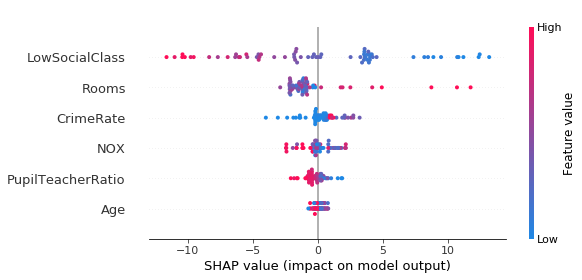

In [17]:
shap.summary_plot(shap_values, x_test)

## SHAP on Images - ImageNet

The data for this practical part comes from the ImageNet repository:
http://www.image-net.org/

It represents a collection of <b>images of around 1000 different kinds of objects</b> and the corresponding <b>class</b>. We use this dataset as a showcase for SHAP on image data.

<b>1) Package Imports </b>

In [18]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
import keras.backend as K
import numpy as np
import json

URL_CLASS_NAMES = "https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json"

/home/craftworks/anaconda3/envs/miba/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


<b>2) Loading pre-trained model </b>

In [19]:
model = VGG16(weights='imagenet', include_top=True)

<b>3) Choosing two images to explain </b>

In [20]:
X,y = shap.datasets.imagenet50()
to_explain = X[[39,41]]

<b>4) Loading ImageNet class names </b>

In [21]:
url = URL_CLASS_NAMES
fname = shap.datasets.cache(url)
with open(fname) as f:
    class_names = json.load(f)

<b>5) Explaining Predictions using SHAP Gradient Explainer</b>

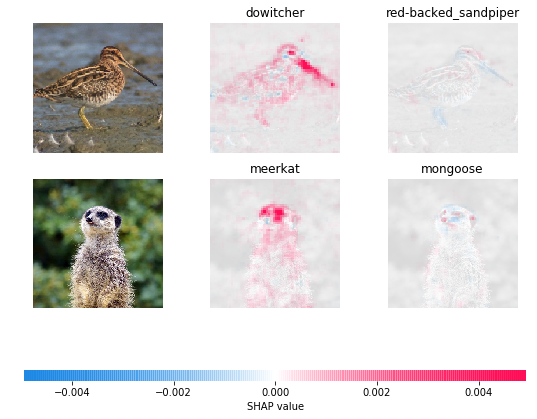

In [22]:
LAYER = 9

# explain how the input to layer number LAYER of the model explains the top two classes
def map2layer(x, layer):
    feed_dict = dict(zip([model.layers[0].input], [preprocess_input(x.copy())]))
    return K.get_session().run(model.layers[layer].input, feed_dict)


e = shap.GradientExplainer(
    (model.layers[LAYER].input, model.layers[-1].output),
    map2layer(X, LAYER),
    local_smoothing=0 # std dev of smoothing noise
)
shap_values,indexes = e.shap_values(map2layer(to_explain, LAYER), ranked_outputs=2)

# get the names for the classes
index_names = np.vectorize(lambda x: class_names[str(x)][1])(indexes)

# plot the explanations
shap.image_plot(shap_values, to_explain, index_names)